<center> <h1>Numerical Methods  -- Assignment 3</h1> </center>

## Problem 1 -- interpolation

### （a）Different interpolation schemes

There are multiple schemes to do 1D interpolation in a defined domain: linear, quadratic, and cubic spline.

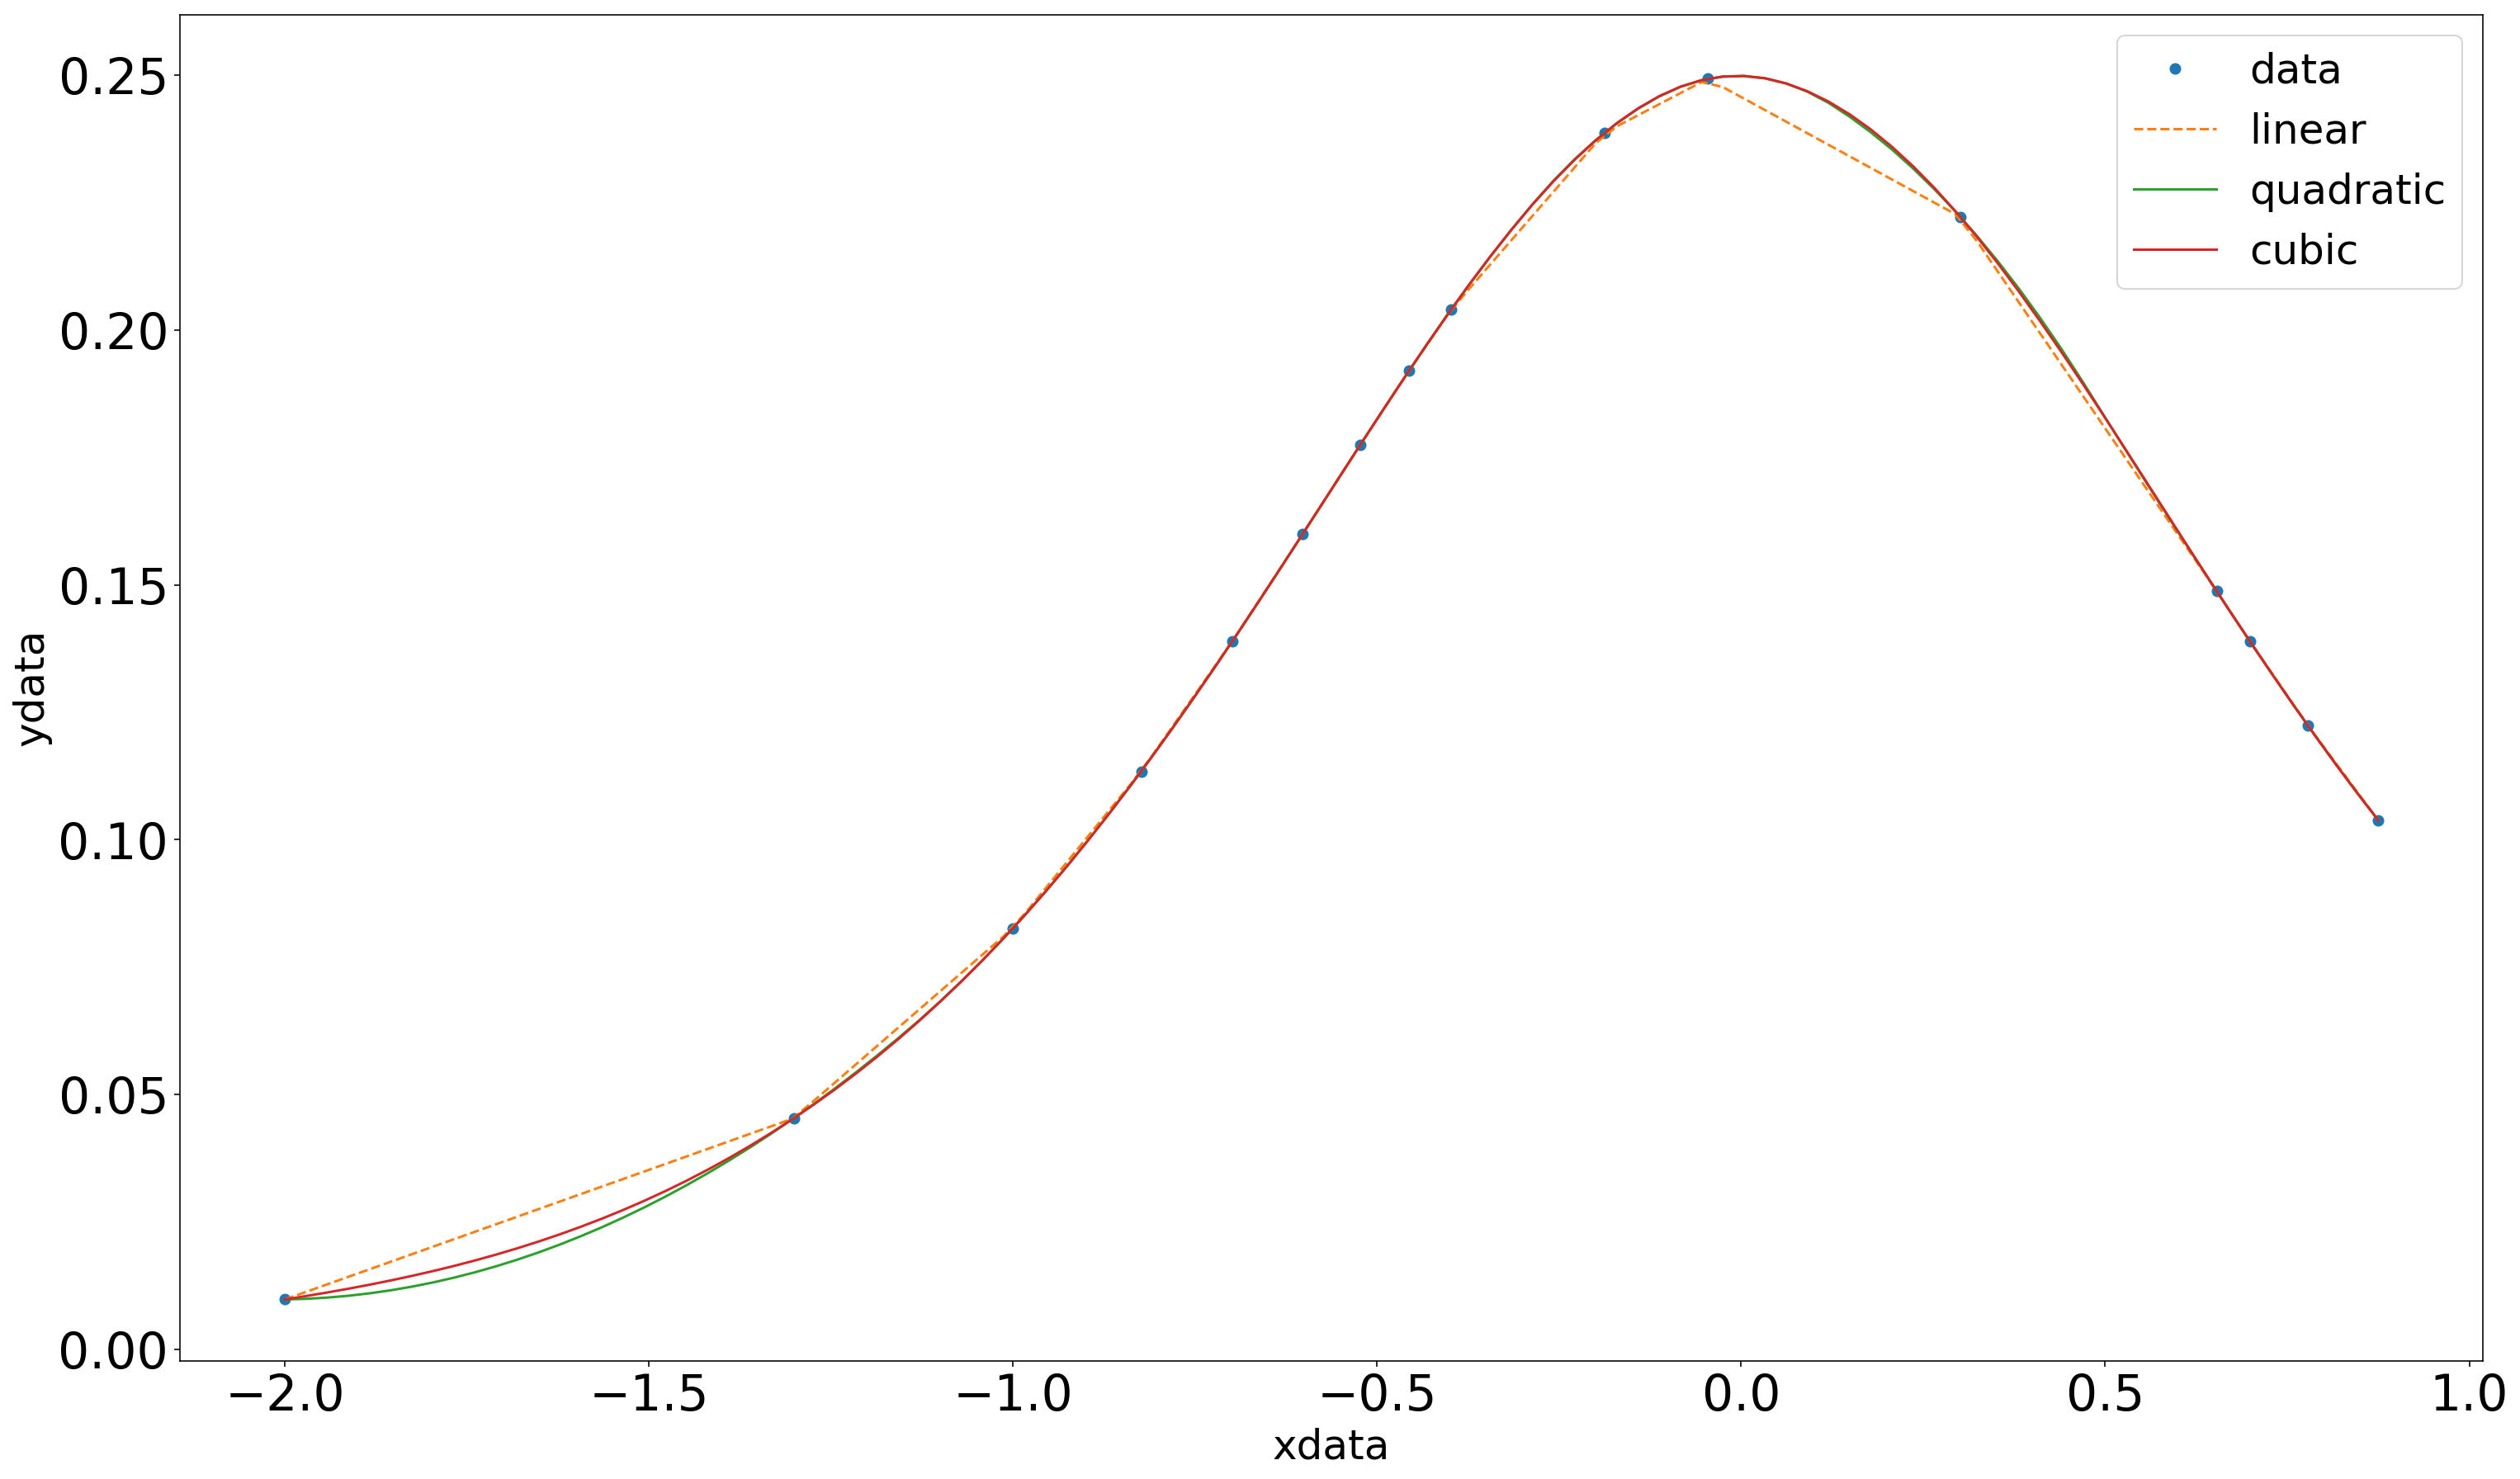

In [27]:
%config InlineBackend.figure_format = 'retina' 
import numpy as np
from scipy.interpolate import interp1d,BSpline
import matplotlib.pyplot as plt

datafile = './Downloads/interp_table.dat'
x,y = np.loadtxt(datafile, comments='#', usecols=[0,1], unpack=True)
#First, give the defined domain for interpolation
x_min, x_max = [x.min(), x.max()]
#Then, generate 100 equi-distant points within the domain
x1 = np.linspace(x_min,x_max,100, endpoint=True)

#The default interpolation method is linear
flinear = interp1d(x,y,bounds_error=False)
fquad = interp1d(x,y,bounds_error=False,kind='quadratic')
fcub = interp1d(x,y,bounds_error=False,kind='cubic')

#interpolated values
y1 = flinear(x1)
y2 = fquad(x1)
y3 = fcub(x1)


#Plot the results
plt.figure(figsize=(25,15))
plt.plot(x, y, 'o')
plt.plot(x1, y1, '--')
plt.plot(x1, y2, '-')
plt.plot(x1, y3, '-')
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)
plt.xlabel('xdata',fontsize=25)
plt.ylabel('ydata',fontsize=25)
plt.legend(['data', 'linear', 'quadratic','cubic'], loc='best',fontsize=25)
plt.show()

### (c) Calculate the derivatives

Now calculate the derivatives of the interpolated functions, by evaluating $\frac{\Delta y}{\Delta x} = \frac{y_n - y_{n-1}}{x_n - x_{n-1}}$

First, we do it using scipy.misc.derivative

### (d) plot the derivatives at tabulated points

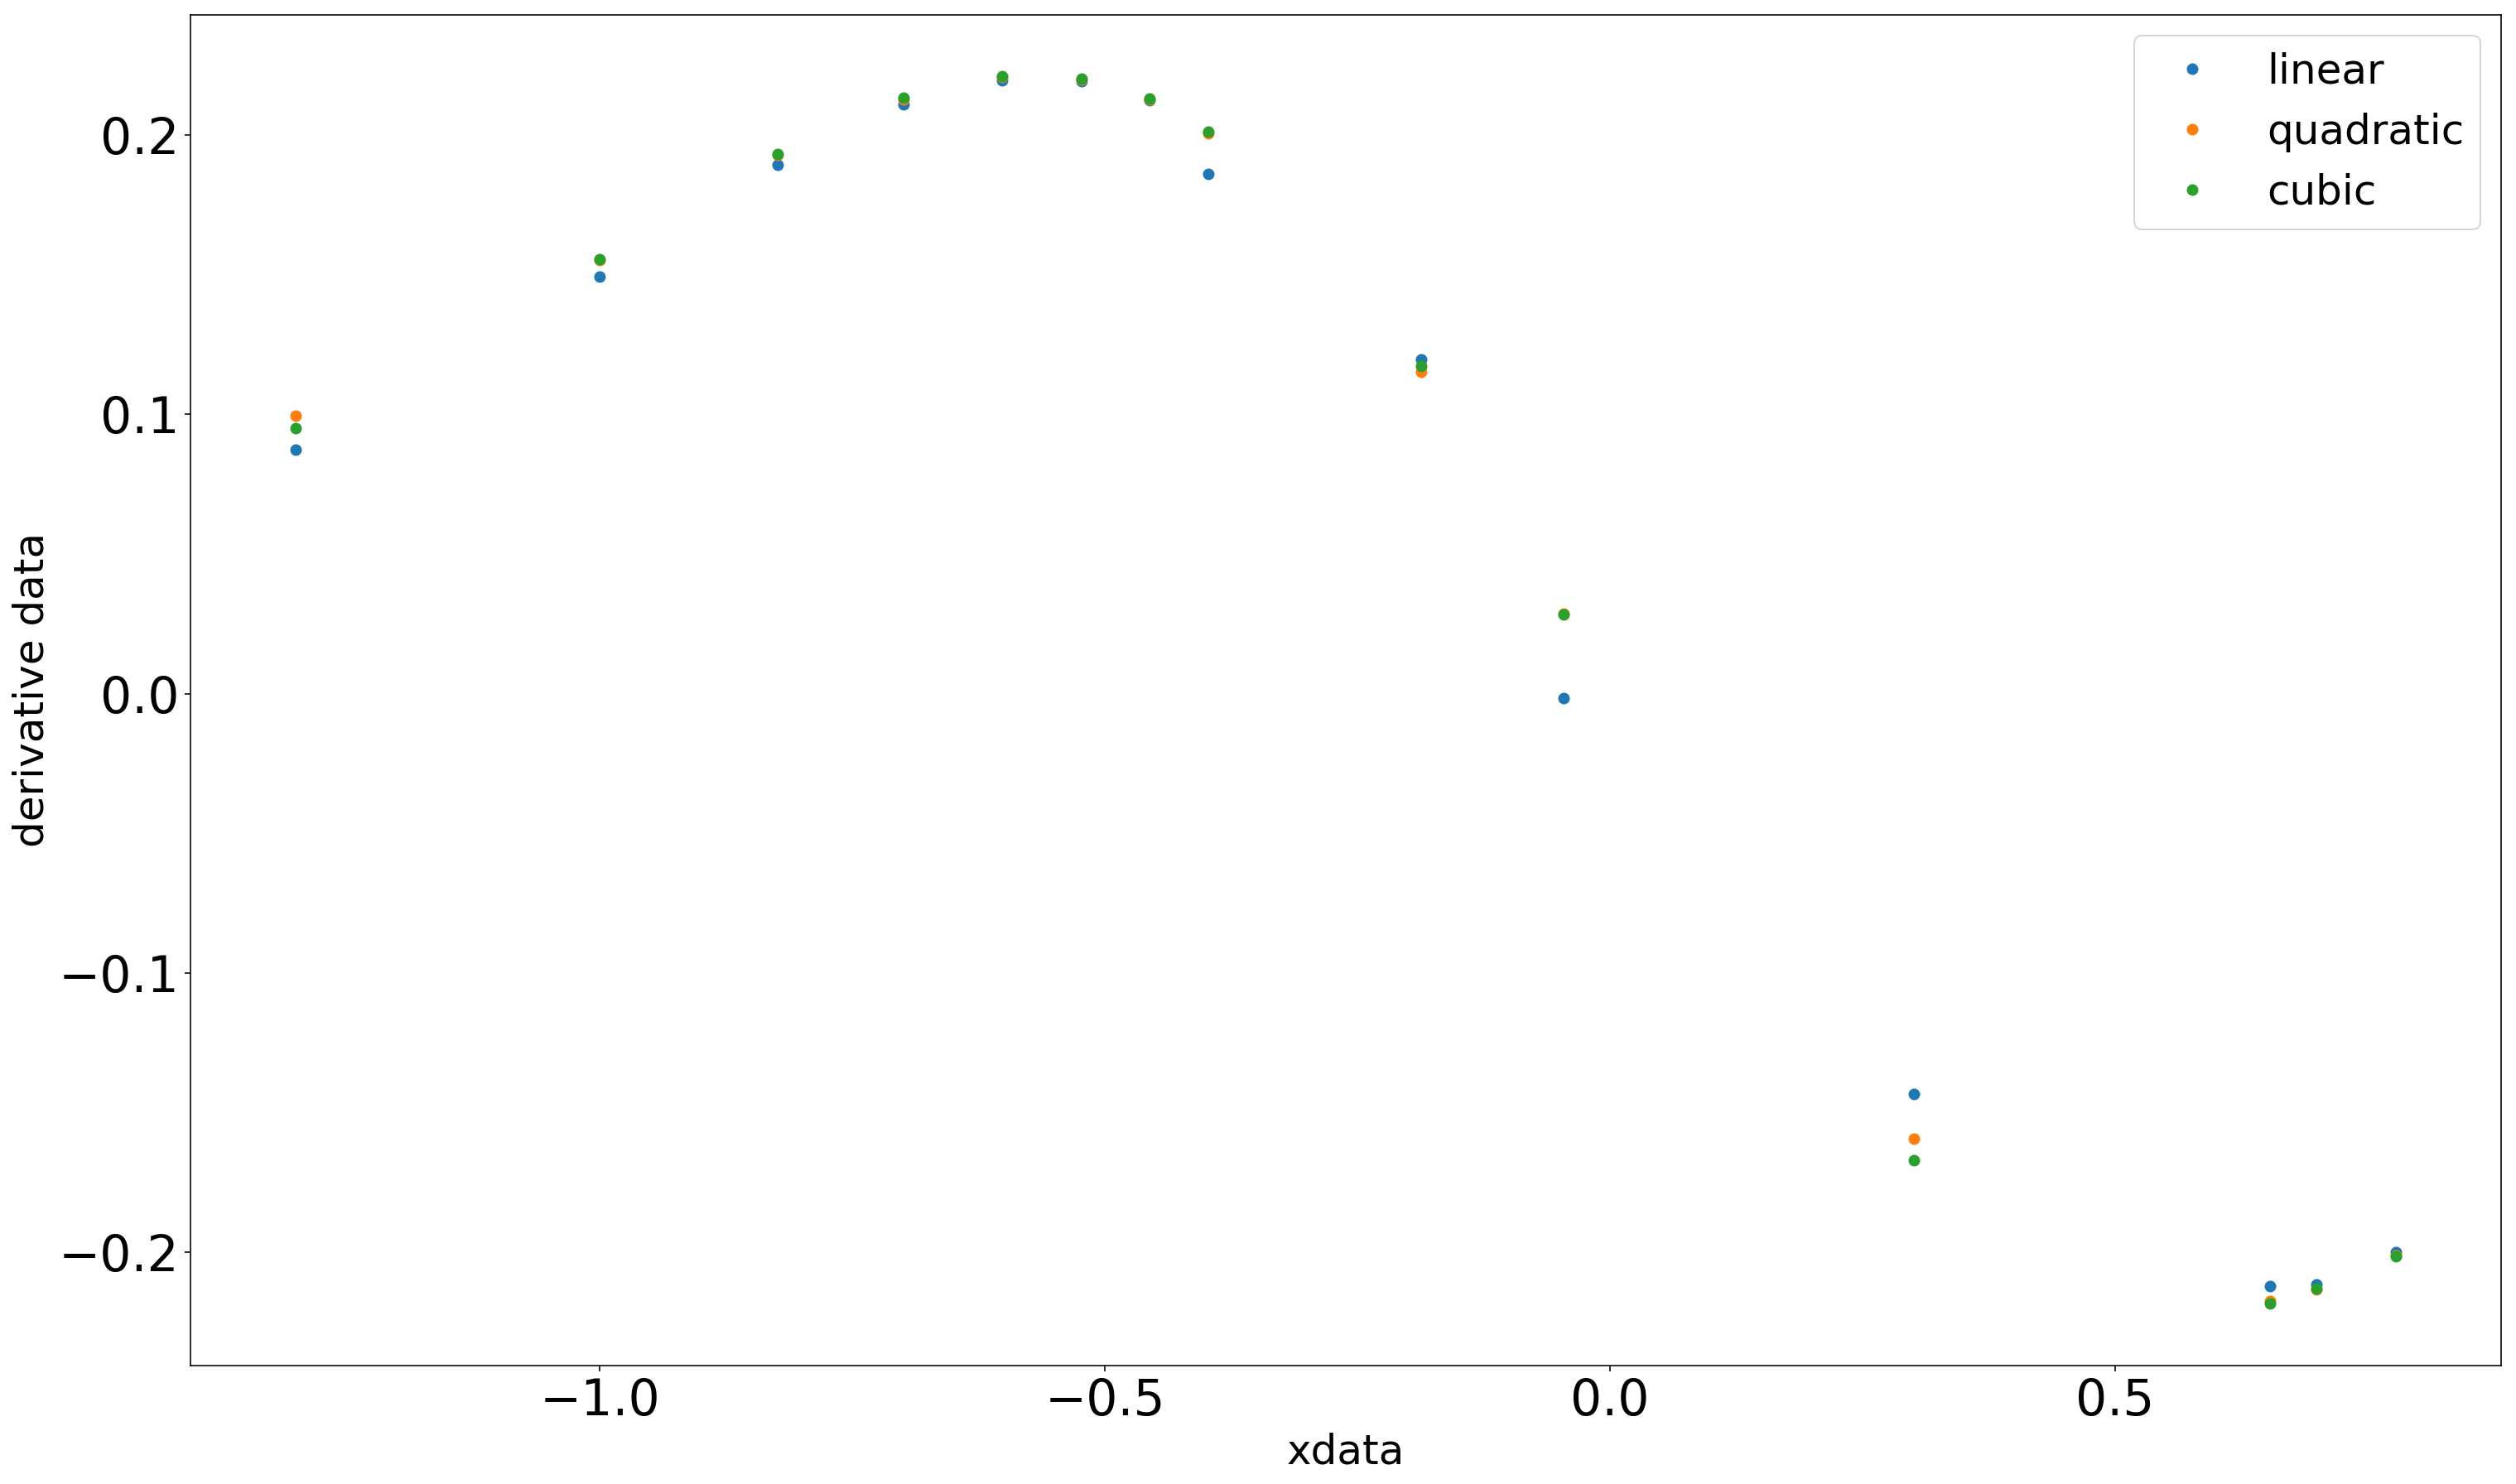

In [3]:
#scipy.misc.derivative calculates the derivatives of a given function
from scipy.misc import derivative 

d1 = derivative(flinear,x,dx=1e-6)
d2 = derivative(fquad,x,dx=1e-6)
d3 = derivative(fcub,x,dx=1e-6)

#Plot the results
plt.figure(figsize=(25,15))
plt.plot(x, d1, 'o')
plt.plot(x, d2, 'o')
plt.plot(x, d3, 'o')
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)
plt.xlabel('xdata',fontsize=25)
plt.ylabel('derivative data',fontsize=25)
plt.legend(['linear', 'quadratic','cubic'], loc='best',fontsize=25)
plt.show()

Alternatively I wrote a function to calculate the derivative.

In [115]:
def deriv(x,y,kind='linear'):
    x_new = np.linspace(x.min(),x.max(),100)
    f = interp1d(x,y,kind=kind,bounds_error=False)
    y_new = f(x_new)
    d = np.array([])
    i = 0
    while i < len(x):
        if i==0:
            deriv = (y_new[1]-y[0])/(x_new[1]-x[0])
            d = np.append(d, deriv)
        elif i-15==0:
            deriv = (y_new[-2]-y[-1])/(x_new[-2]-x[-1])
            d = np.append(d, deriv)
        else:
            xa = np.subtract(x_new,x[i])
            xa = np.absolute(xa)
            ind = np.argmin(xa)
            deriv = (y_new[ind]-y[i])/(x_new[ind]-x[i])
            d = np.append(d, deriv)
        i += 1
    return d

### (d) plot the derivatives

The graph below shows the first order derivative at tabulated points.

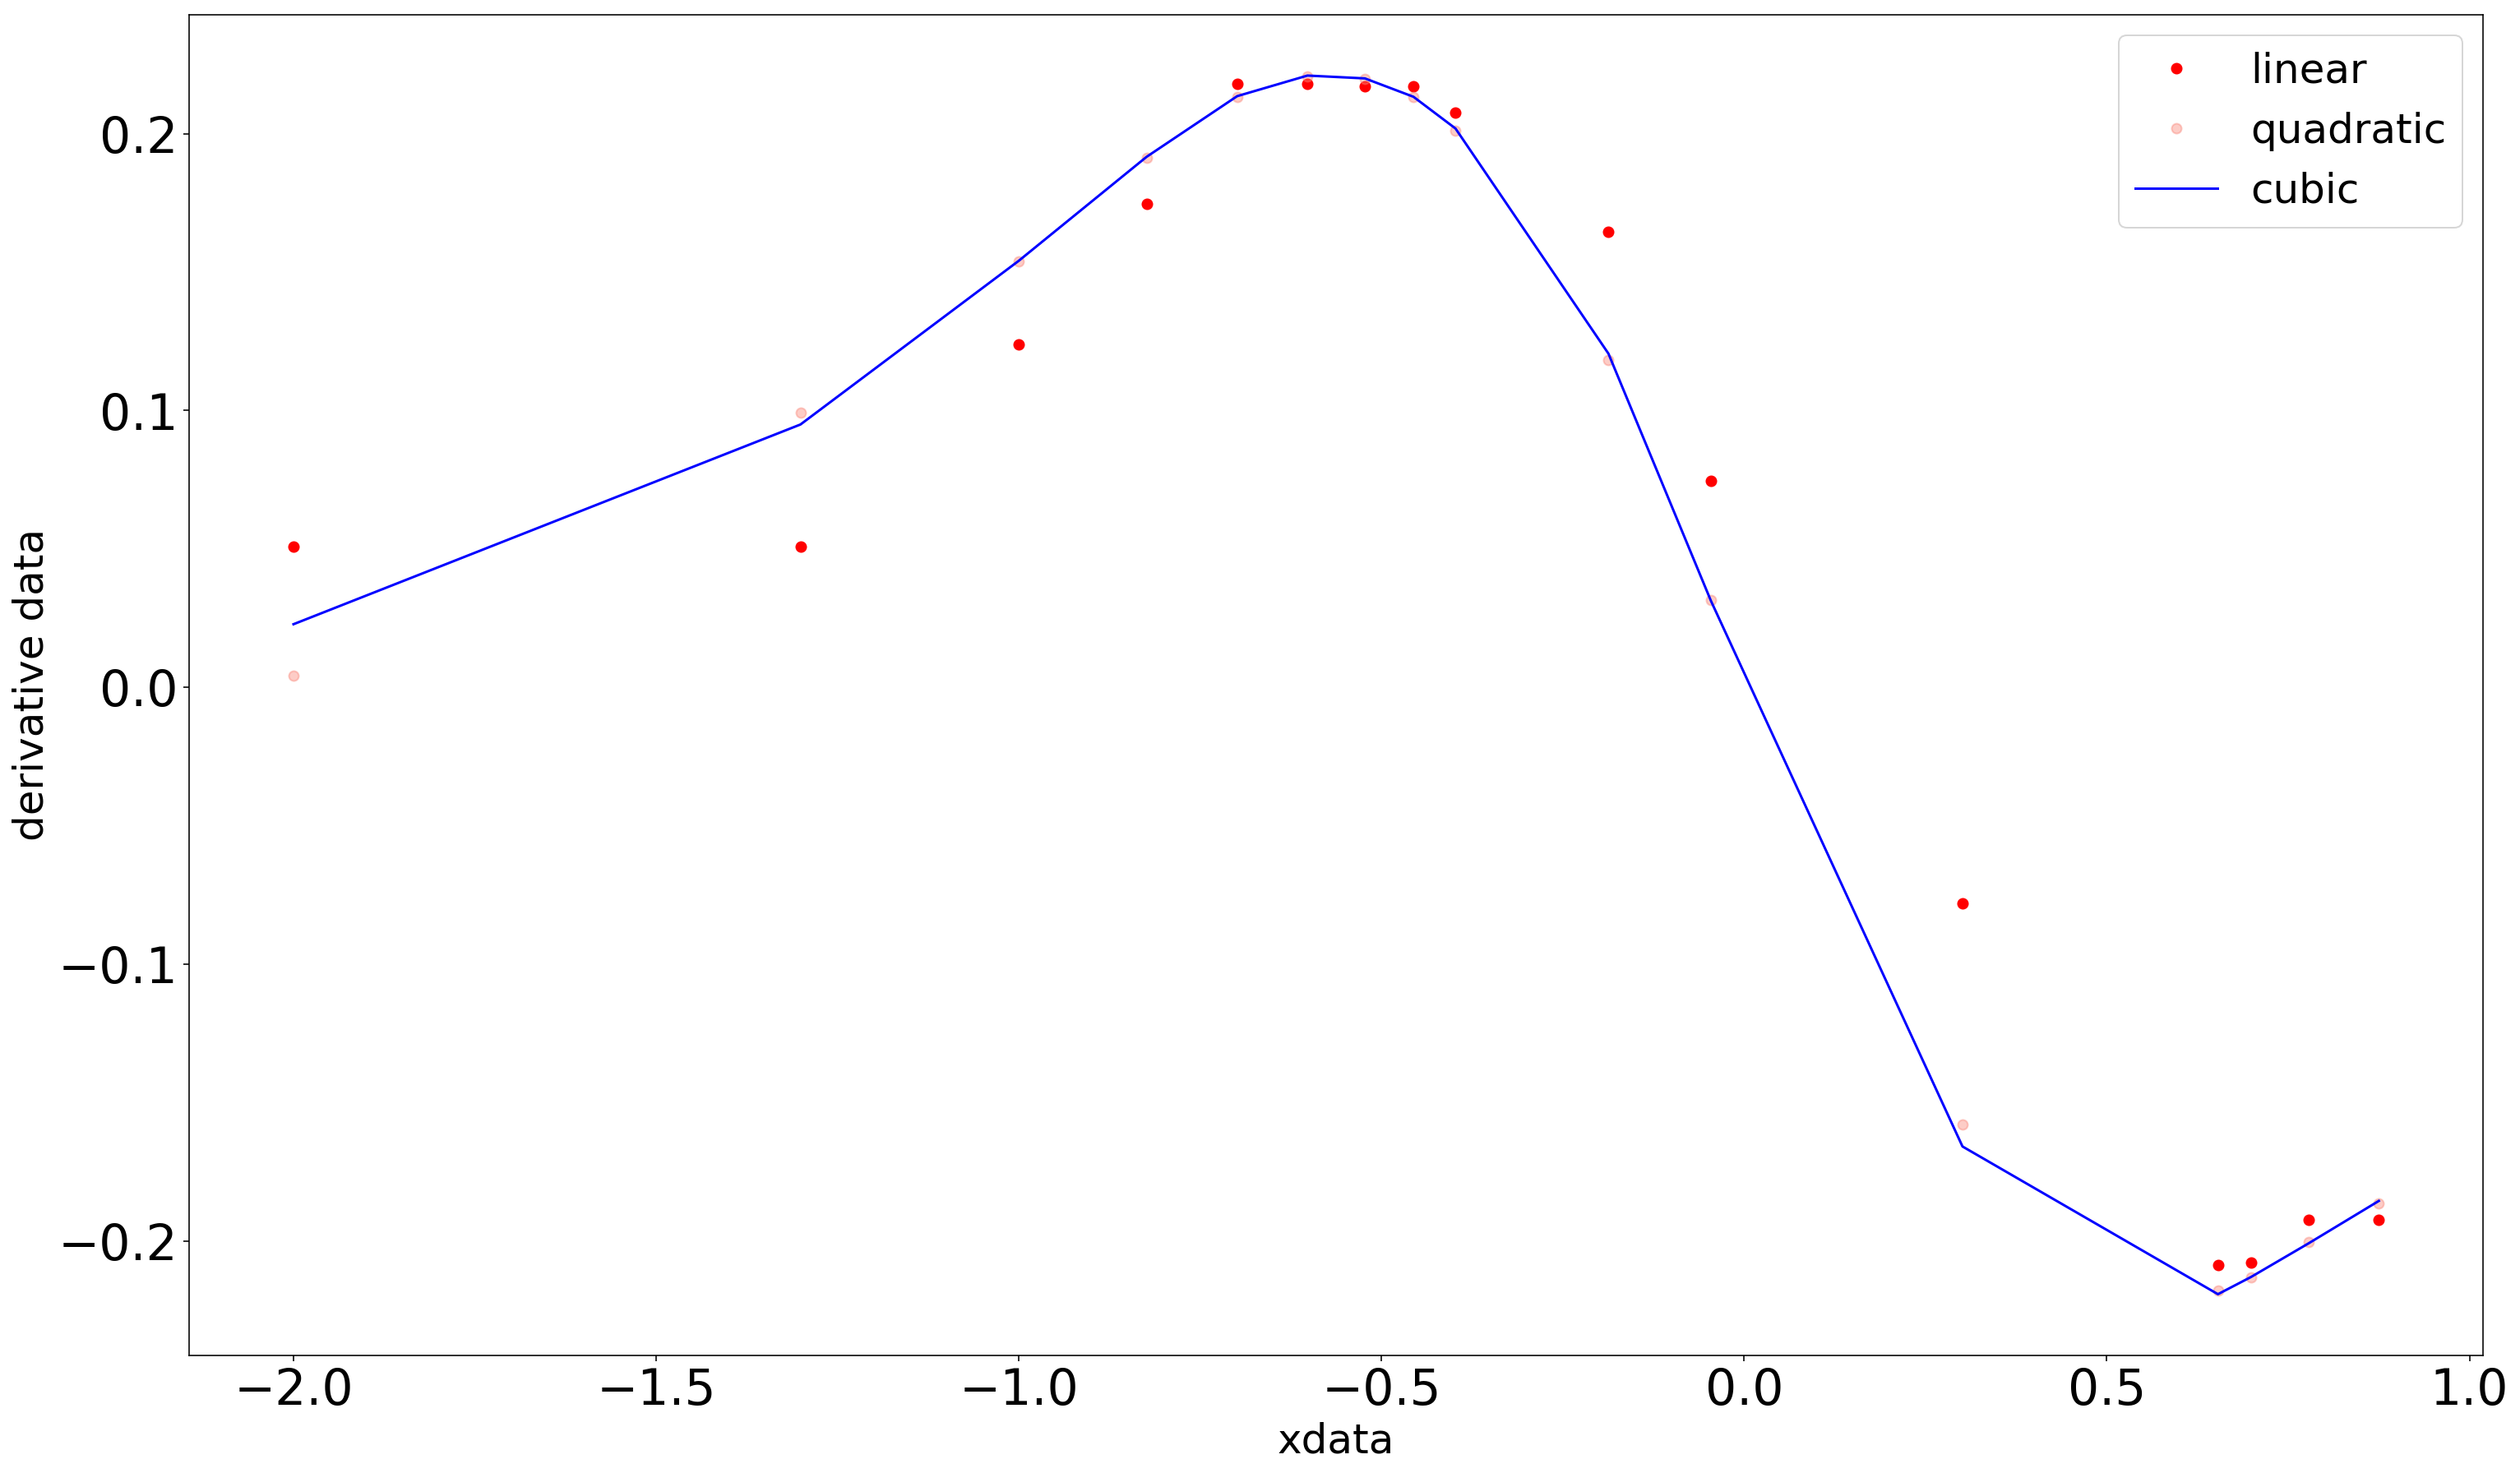

In [138]:
d1 = deriv(x,y)
d2 = deriv(x,y,'quadratic')
d3 = deriv(x,y,'cubic')

#Plot the results
plt.figure(figsize=(25,15))
plt.plot(x, d1, 'o',color='r')
plt.plot(x, d2, 'o',color='salmon',alpha=0.4)
plt.plot(x, d3, '-',color='b')
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)
plt.xlabel('xdata',fontsize=25)
plt.ylabel('derivative data',fontsize=25)
plt.legend(['linear', 'quadratic','cubic'], loc='best',fontsize=25)
plt.show()

The graph below shows the first order derivative at the generated equidistant points.

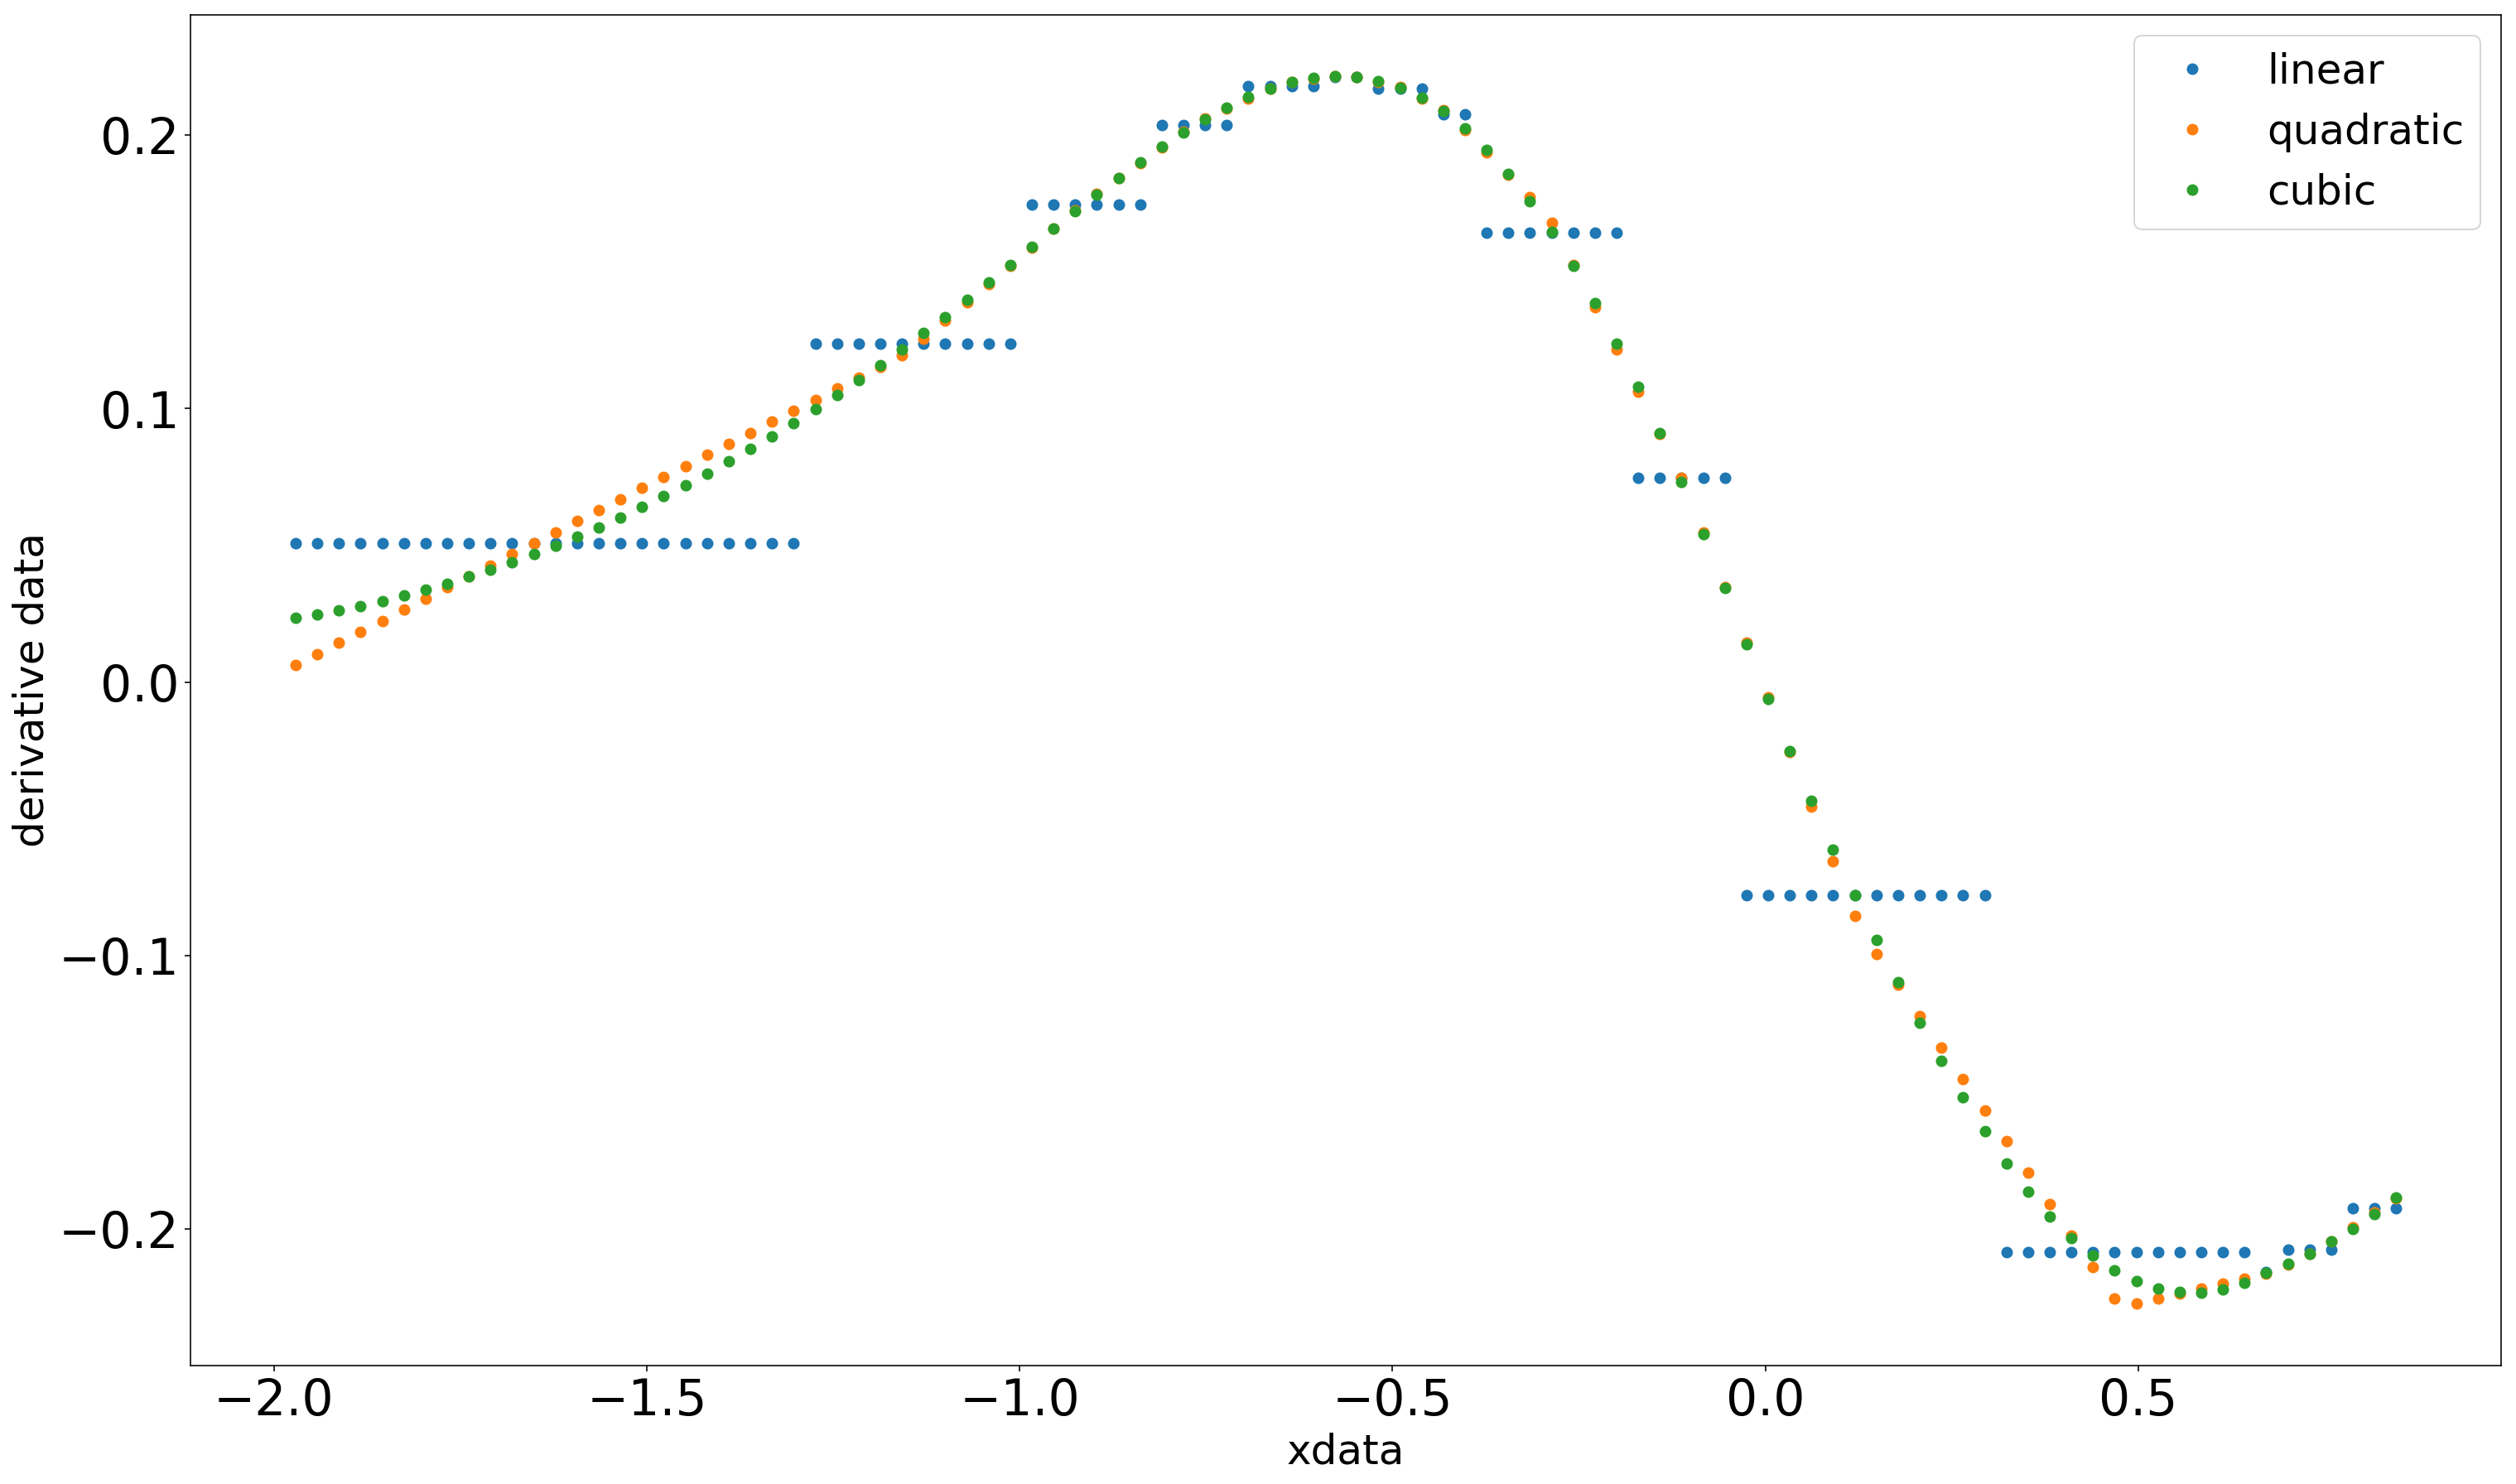

In [137]:
d1 = derivative(flinear,x1,dx=1e-6)
d2 = derivative(fquad,x1,dx=1e-6)
d3 = derivative(fcub,x1,dx=1e-6)

#Plot the results
plt.figure(figsize=(25,15))
plt.plot(x1, d1, 'o')
plt.plot(x1, d2, 'o')
plt.plot(x1, d3, 'o')
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)
plt.xlabel('xdata',fontsize=25)
plt.ylabel('derivative data',fontsize=25)
plt.legend(['linear', 'quadratic','cubic'], loc='best',fontsize=25)
plt.show()

We can see from the graph above that the derivative of linear interpolation has a discrete spectrum, while the derivative of quadratic interpolation is though continuous but not smooth; only the cubic interpolation has smooth and continuous first derivative.

### (c) calculate the derivatives

In [121]:
print "The 1st derivative using linear interpolation is:",d1
print "The 1st derivative using quadratic interpolation is:",d2
print "The 1st derivative using cubic interpolation is:",d3

The 1st derivative using linear interpolation is: [ 0.05085846  0.05085846  0.12388499  0.17478122  0.2178413   0.2178413
  0.21702242  0.21702242  0.20758036  0.16442261  0.07469071 -0.07810258
 -0.20859101 -0.20762557 -0.19237437 -0.19237437]
The 1st derivative using quadratic interpolation is: [ 0.00425808  0.09934083  0.15376633  0.19132689  0.21316904  0.22063538
  0.21965361  0.21317163  0.2011224   0.11834004  0.03166023 -0.15796676
 -0.21787606 -0.21305745 -0.20017395 -0.18629849]
The 1st derivative using cubic interpolation is: [ 0.0228405   0.09496947  0.15410007  0.19161259  0.21354045  0.22097474
  0.21995194  0.21331527  0.20185384  0.12055619  0.03125434 -0.16576493
 -0.2191101  -0.21287294 -0.20075452 -0.18542185]


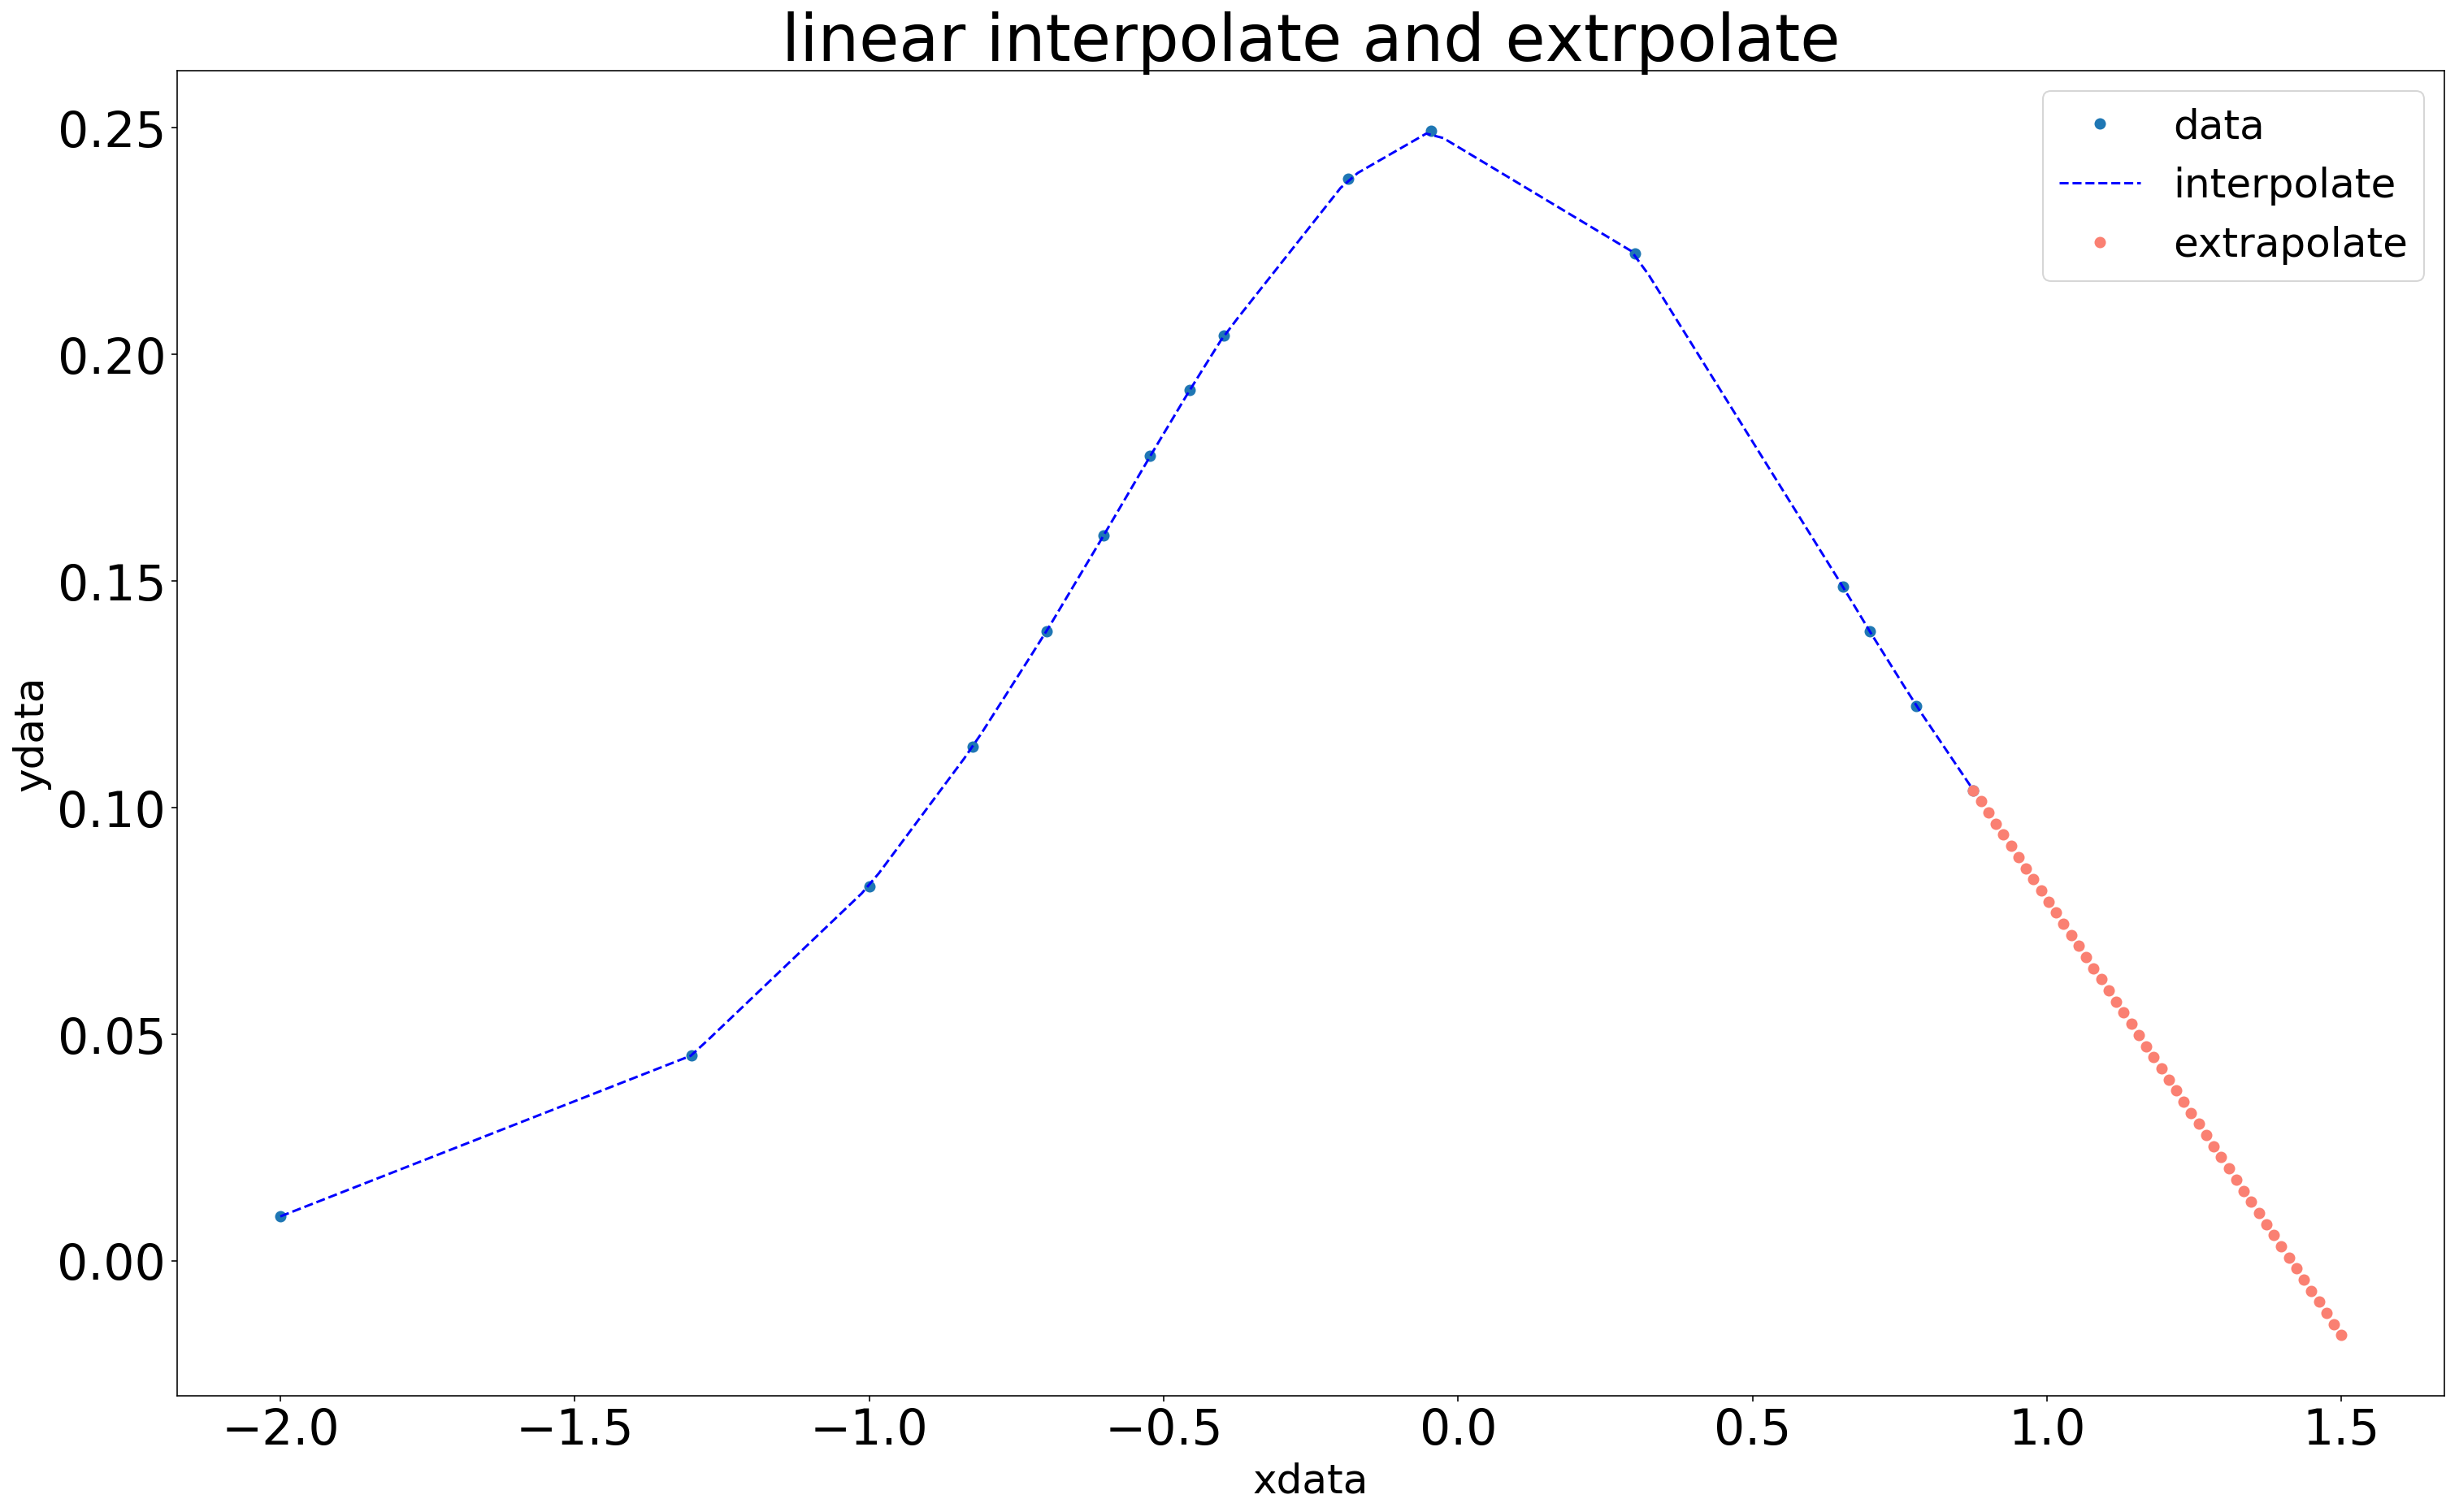

In [58]:
from scipy.interpolate import splev,splrep

#linear extrapolation
x_e1 = np.linspace(x.max(),1.5,50)
#using sorep and splev allows user to find the spline in the defined degree
#and represent the evaluated values
sp1 = splrep(x,y,k=1)
y_e1 = splev(x_e1,sp1)

#plot the results
plt.figure(figsize=(25,15))
plt.plot(x, y, 'o')
plt.plot(x1,y1,'--',color='b')
plt.plot(x_e1, y_e1, 'o',color='salmon')
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)
plt.title('linear interpolate and extrpolate',fontsize=40)
plt.xlabel('xdata',fontsize=25)
plt.ylabel('ydata',fontsize=25)
plt.legend(['data', 'interpolate','extrapolate'], loc='best',fontsize=25)
plt.show()


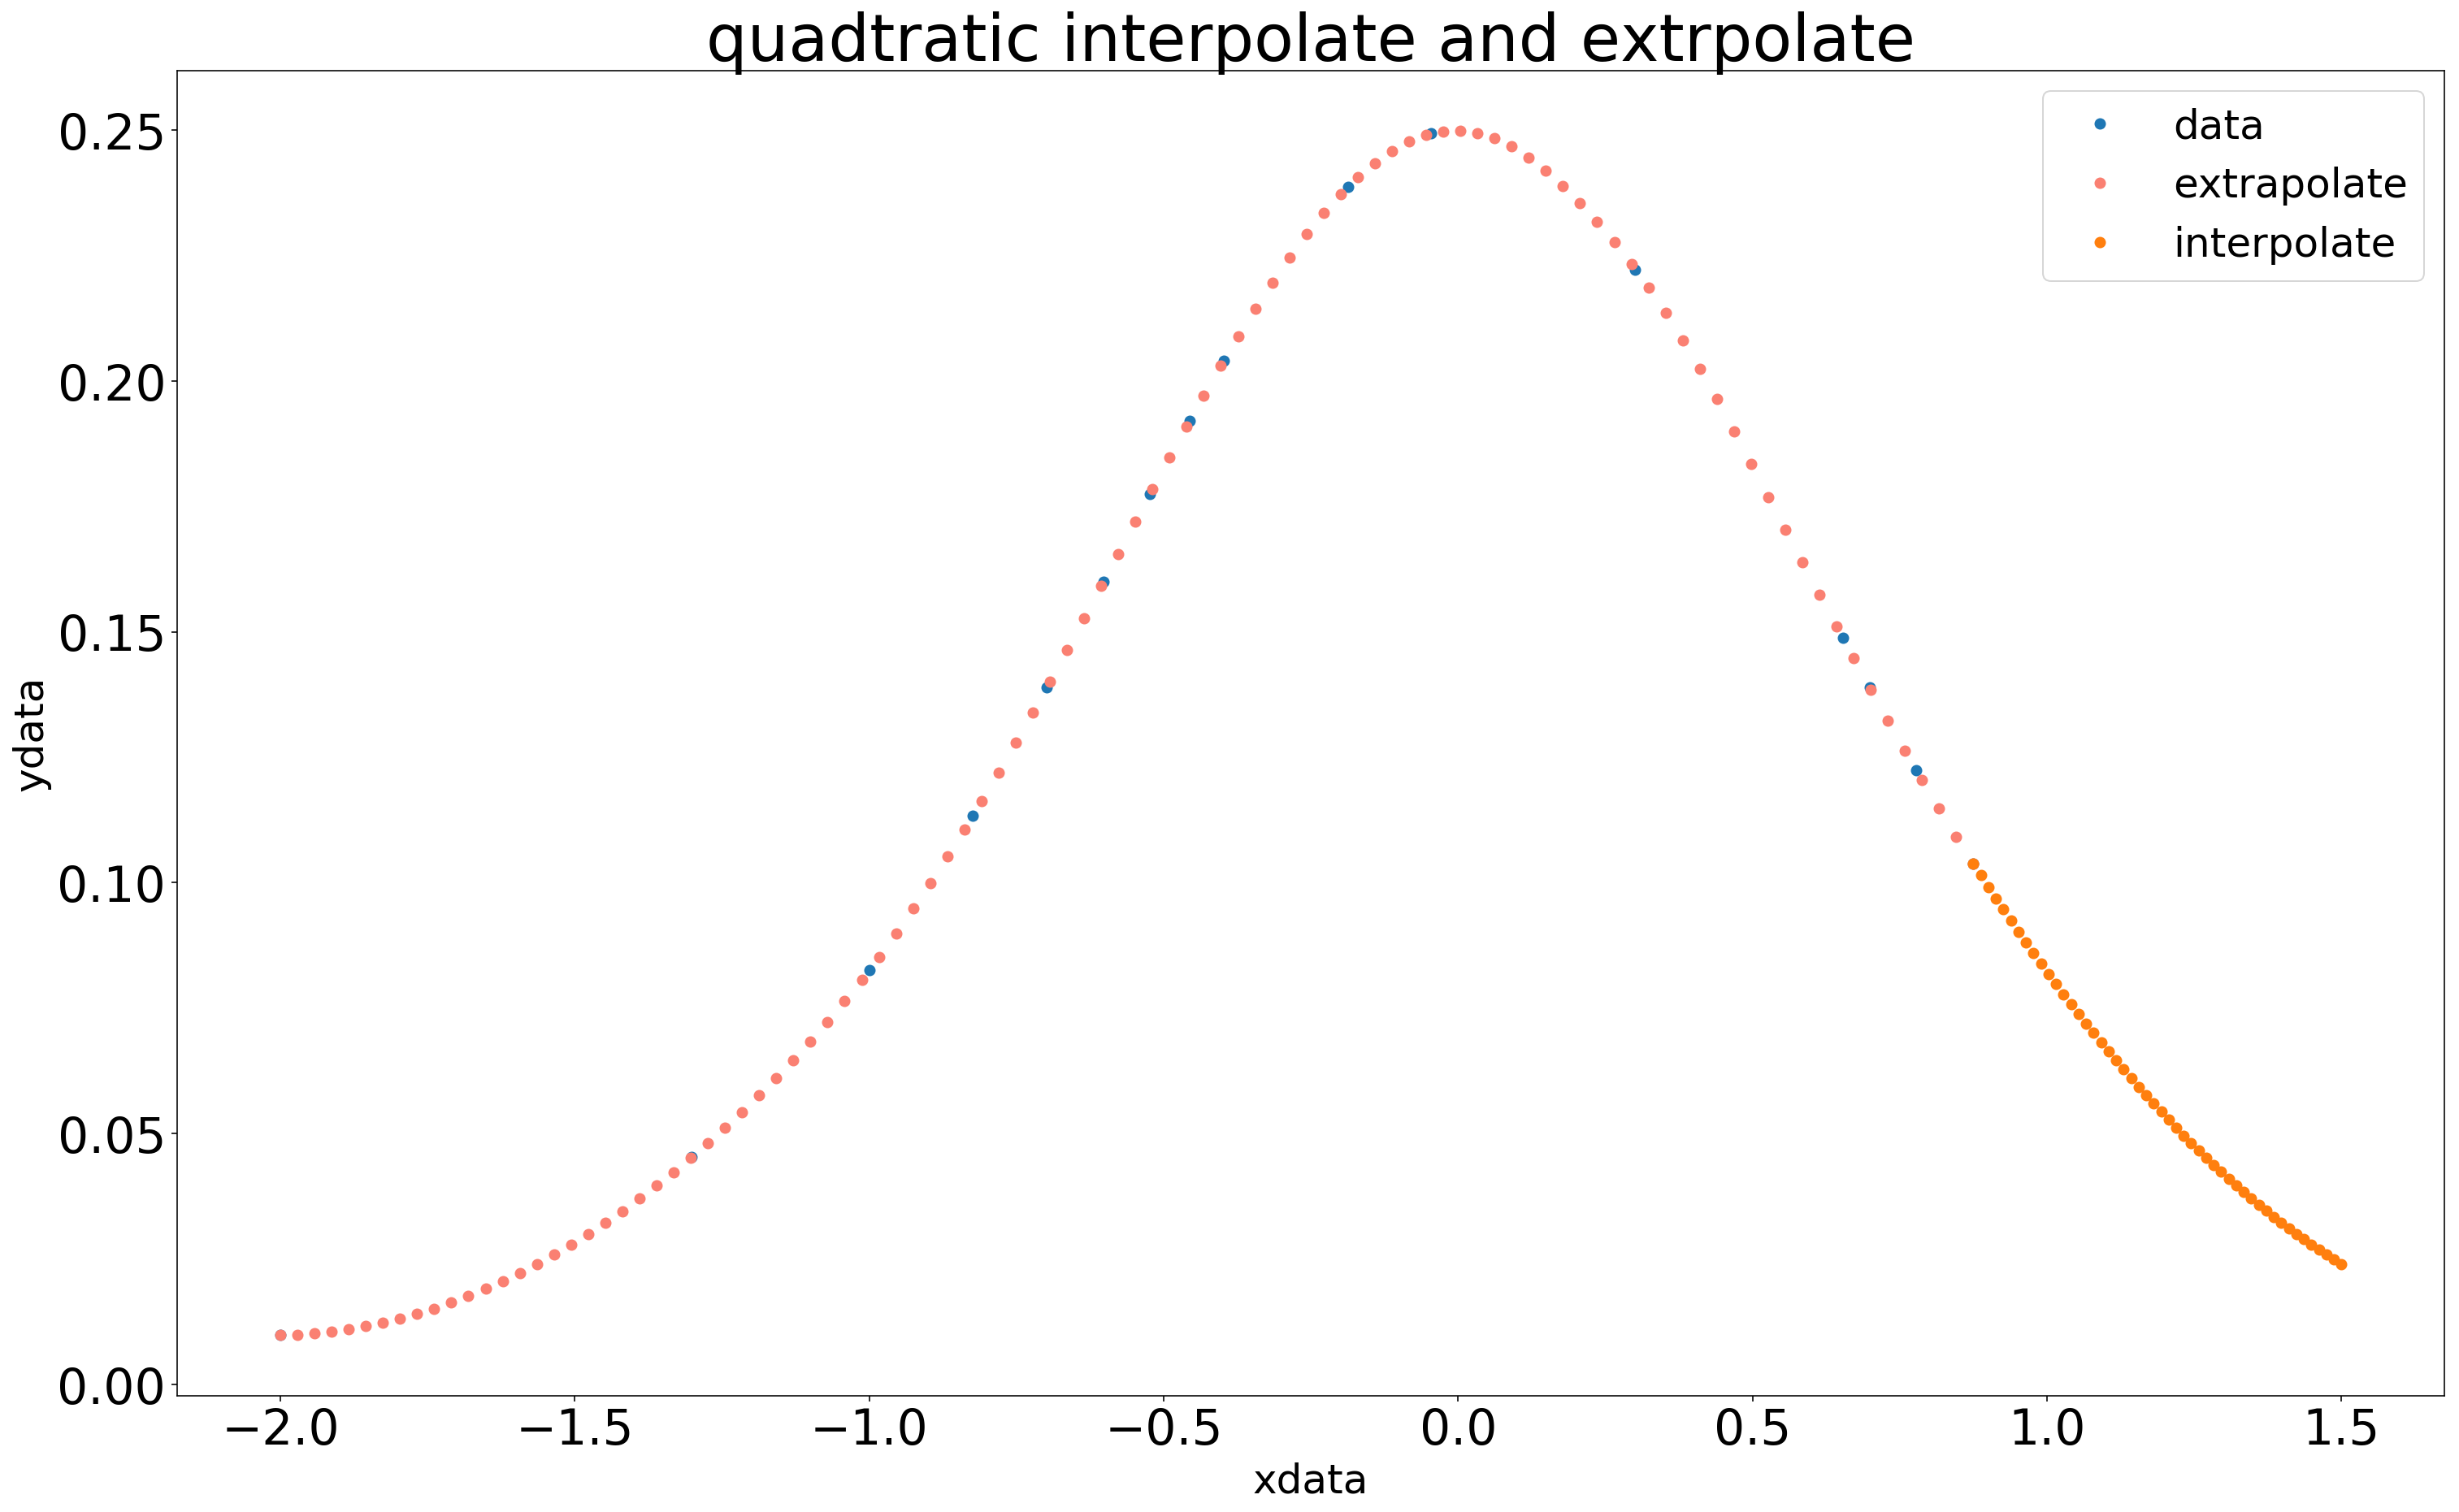

In [59]:
#quadratic extrapolation
sp2 = splrep(x,y,k=2)
y_e2 = splev(x_e1,sp2)


#plot the results
plt.figure(figsize=(25,15))
plt.plot(x, y, 'o')
plt.plot(x1, y2, 'o',color='salmon')
plt.plot(x_e1,y_e2,'o')
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)
plt.title('quadtratic interpolate and extrpolate',fontsize=40)
plt.xlabel('xdata',fontsize=25)
plt.ylabel('ydata',fontsize=25)
plt.legend(['data', 'extrapolate','interpolate'], loc='best',fontsize=25)
plt.show()


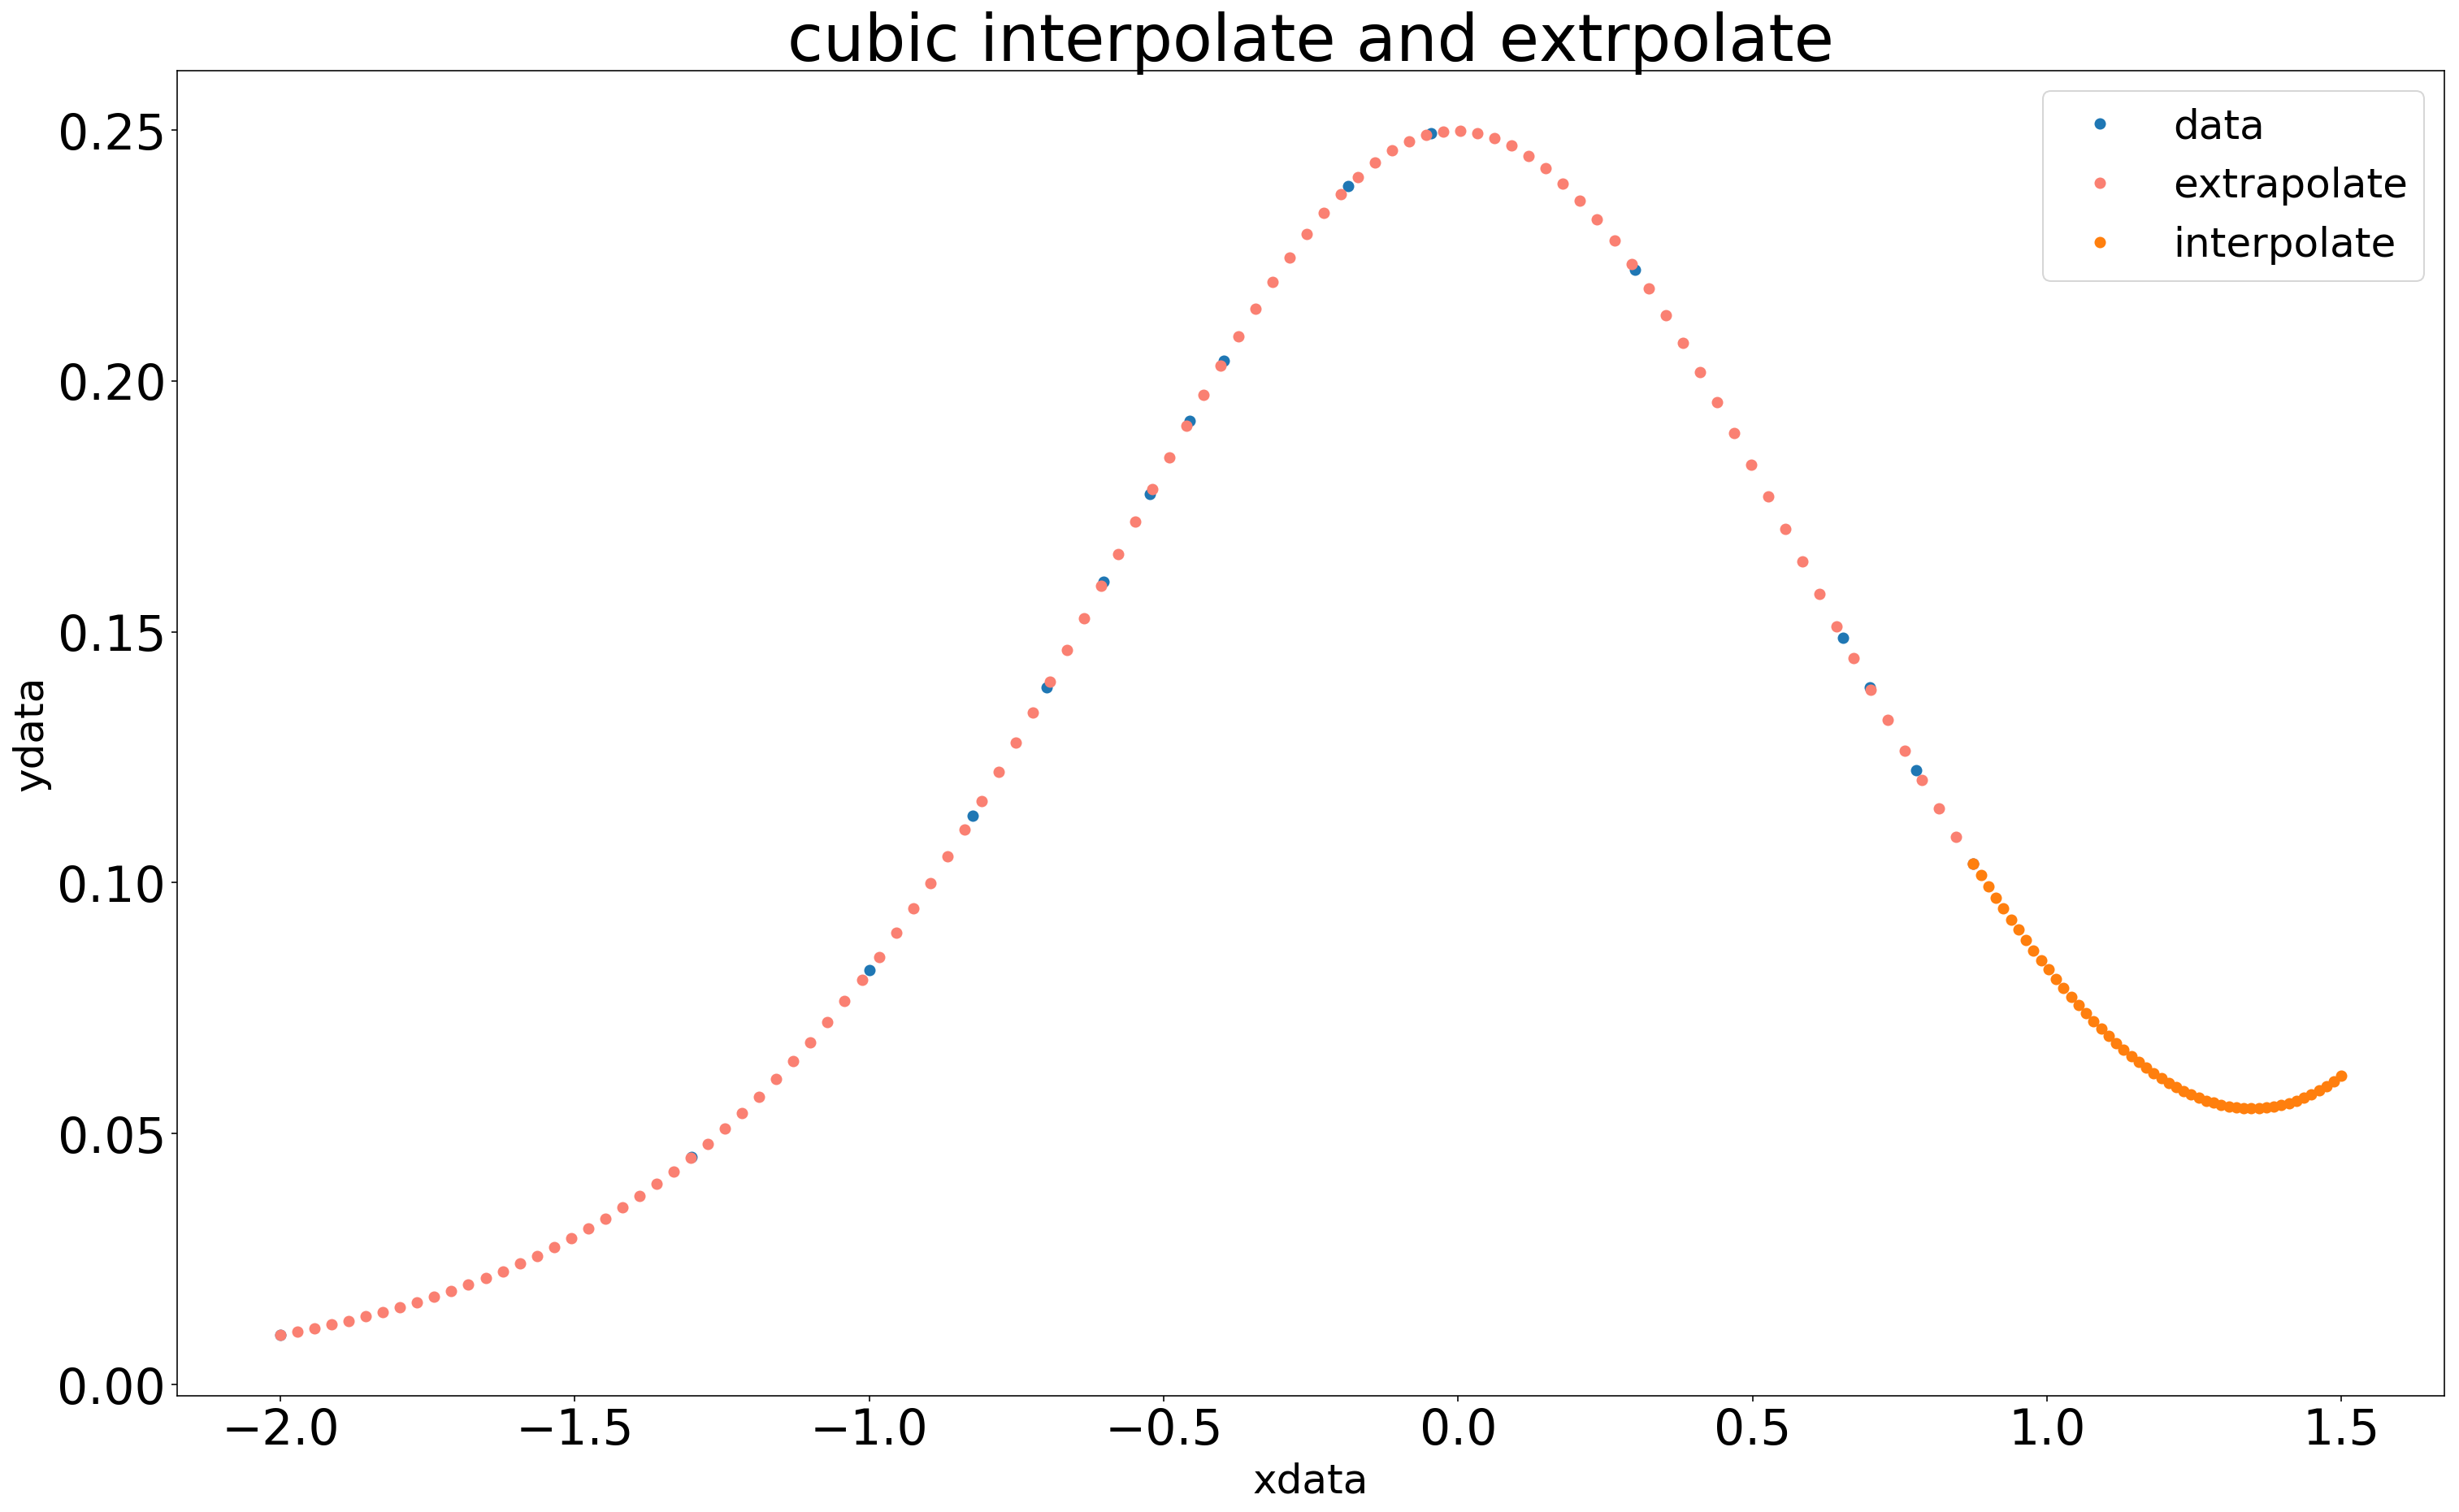

In [60]:
#cubic extrapolation
sp3 = splrep(x,y,k=3)
y_e3 = splev(x_e1,sp3)


#plot the results
plt.figure(figsize=(25,15))
plt.plot(x, y, 'o')
plt.plot(x1, y3, 'o',color='salmon')
plt.plot(x_e1,y_e3,'o')
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)
plt.title('cubic interpolate and extrpolate',fontsize=40)
plt.xlabel('xdata',fontsize=25)
plt.ylabel('ydata',fontsize=25)
plt.legend(['data', 'extrapolate','interpolate'], loc='best',fontsize=25)
plt.show()


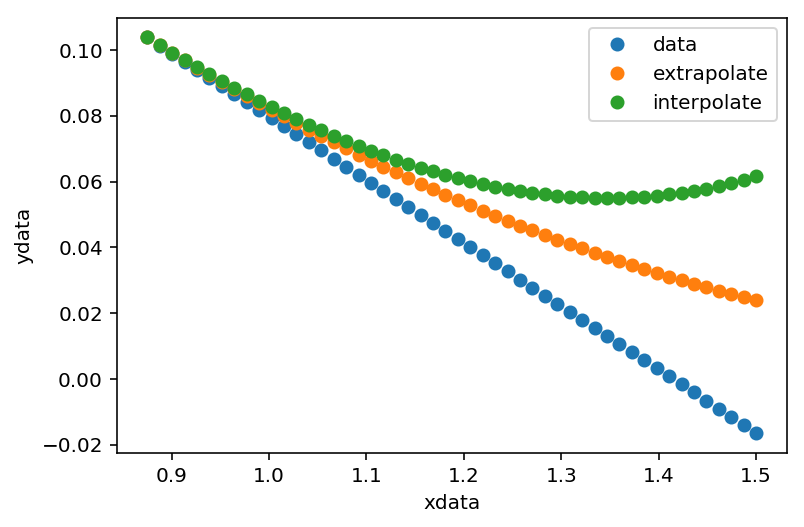

In [69]:
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
plt.plot(x_e1,y_e1,'o')
plt.plot(x_e1,y_e2,'o')
plt.plot(x_e1,y_e3,'o')
plt.xlabel('xdata',fontsize=10)
plt.ylabel('ydata',fontsize=10)
plt.legend(['data', 'extrapolate','interpolate'], loc='best',fontsize=10)
plt.show()

### (f) best method

From the three plots above we can come to the conclusion that in the extrapolation region, only the cubic method is smooth and continuous in both the original funcion and first derivative, thus is the best suited extrapolation method. It returns the smoothest result both in the original xy doamain and in its first derivative. But since we are not informed of what the tabulated function describes, though the behaviour of the three interpolation method could be drawn, but to decide a best method, more information about what actually the tabulated function describes (i.e. luminosity, velocity,etc) is needed to draw an educated guess as to indeed which one is the best method.

From the plot above we can clearly see that in the extrapolated region, the extrapolated results start to show a difference approximately at 1.0, and the differences only increase as x goes further from the maximum tabulated point. So it is sensible to say that within 1.0 the extrapolation trsults are reliable, and due to the lack of a physical model of the tabulated function, we can not trust the extrapolation beyond 1.0

## Problem 2 -- radial velocity

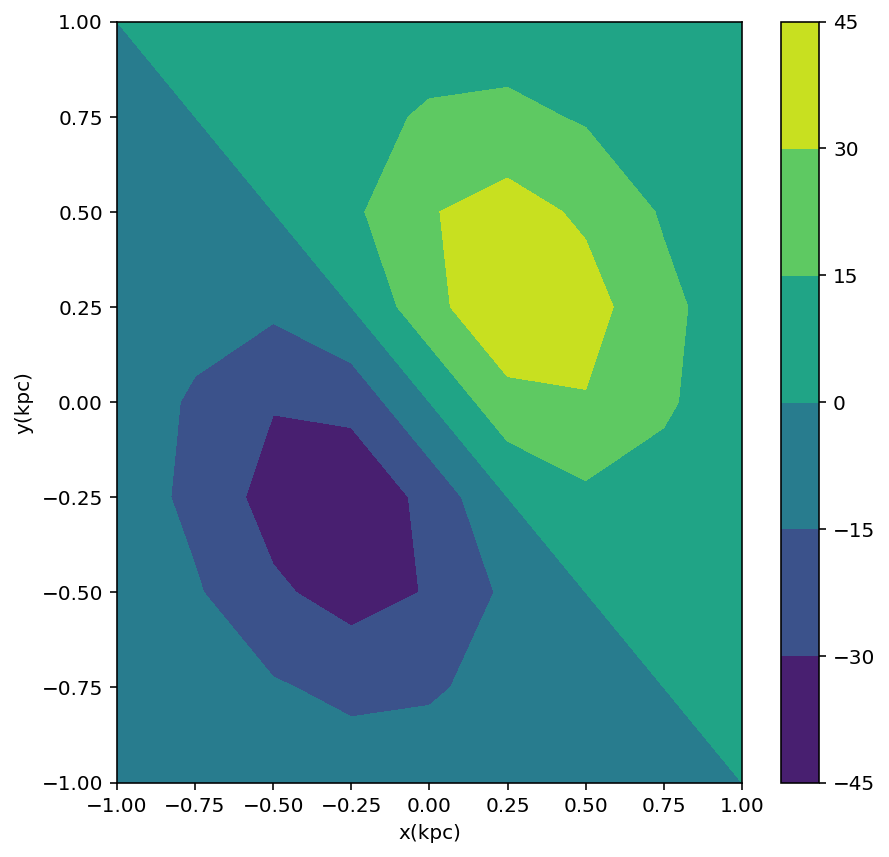

In [78]:
datafile = './Downloads/interp2d_table_v2.dat'
z = np.loadtxt(datafile, usecols=[2], unpack=True).reshape(9,9)
x = np.linspace(-1,1,9,endpoint=True)
y = x
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
plt.xlabel('x(kpc)')
plt.ylabel('y(kpc)')
plt.contourf(x,y,z)
plt.colorbar()
plt.show()

### (a) bilinear interpolation

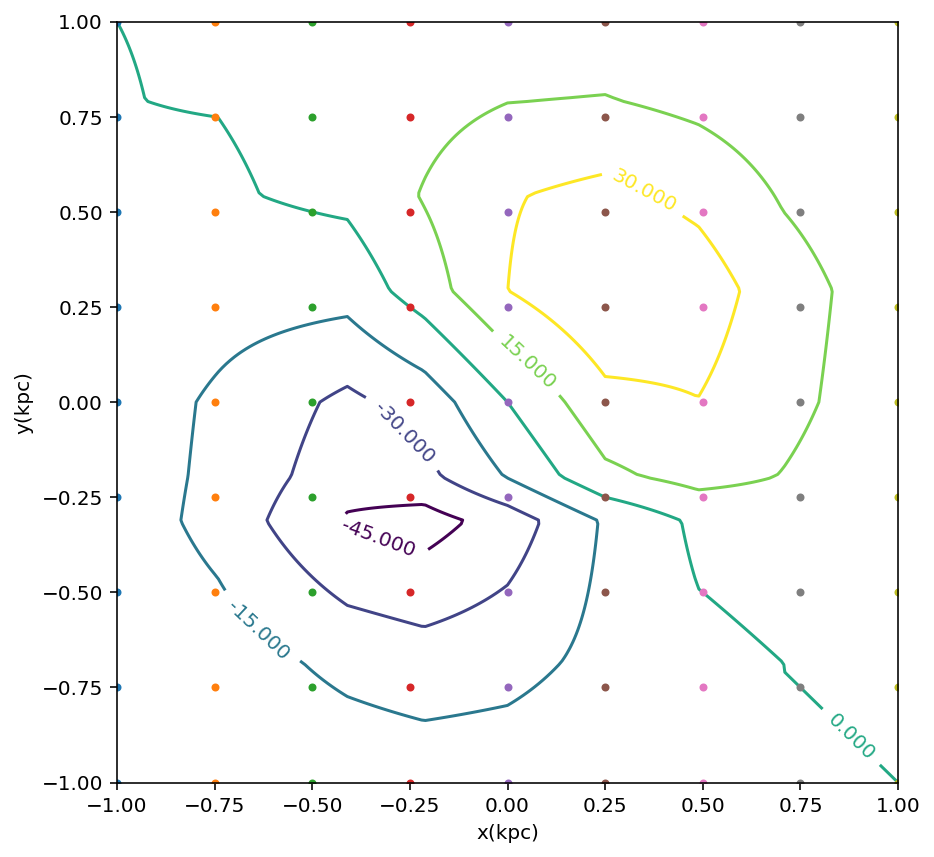

In [100]:
from scipy.interpolate import interp2d


f = interp2d(x,y,z,kind='linear')
x_new = np.linspace(-1,1,201,endpoint=True)
y_new = x_new
z_new = f(x_new,y_new)
plt.figure(figsize=(7,7))
plt.xlabel('x(kpc)')
plt.ylabel('y(kpc)')
plt.plot(x,y,'.')
cs = plt.contour(x_new,y_new,z_new)
plt.clabel(cs, inline=1, fontsize=10,color='r')
plt.show()


As indicated by the colourbar on the right side of the plot, the darker colour corresponds to smaller redial velocity whereas the lighter clour corresponds to larger velocity. The interpolated plot shows more explicitly that the galaxy is rotating clockwise(viewing from the xy-plane).